In [54]:
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys

sys.path.append("../../")
import pyTCSPC as pc

%matplotlib inline
%config InlineBackend.figure_format='retina'
matplotlib.rcParams.update({'font.size': 12, 'font.sans-serif': 'DejaVu Sans'})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


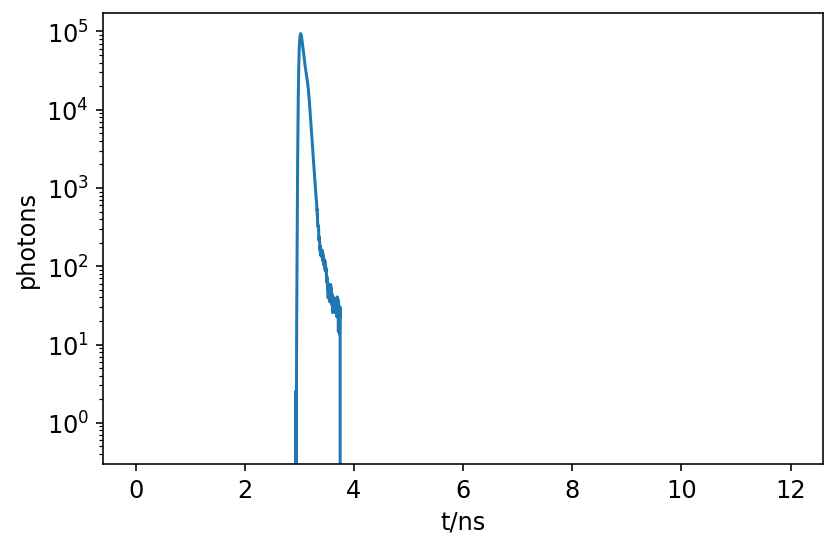

In [55]:
fig, ax = plt.subplots(figsize=(6,4))
irf = pc.load_sdt(r"sample_data/IRF.sdt", dims="CXM", dtype=np.uint32, use_dask=False)

dc_kwargs_M2 = {"trunc": True, "peak_start": 2.93, "peak_end": 3.75, "bgsub": True, "bg_start": 8, "bg_end": 10, "fig": fig, "ax": ax}
fig, ax, irfdc_M2 = pc.decay_curve(irf.sel(channel="M2"), plot=True, **dc_kwargs_M2)
# plt.yscale("linear")

In [56]:
ip  = pc.load_sdt("sample_data/SDT.sdt", use_dask=False)
dc = pc.decay_curve(ip.isel(file_info=0, channel=0))
# plt.plot(dc)

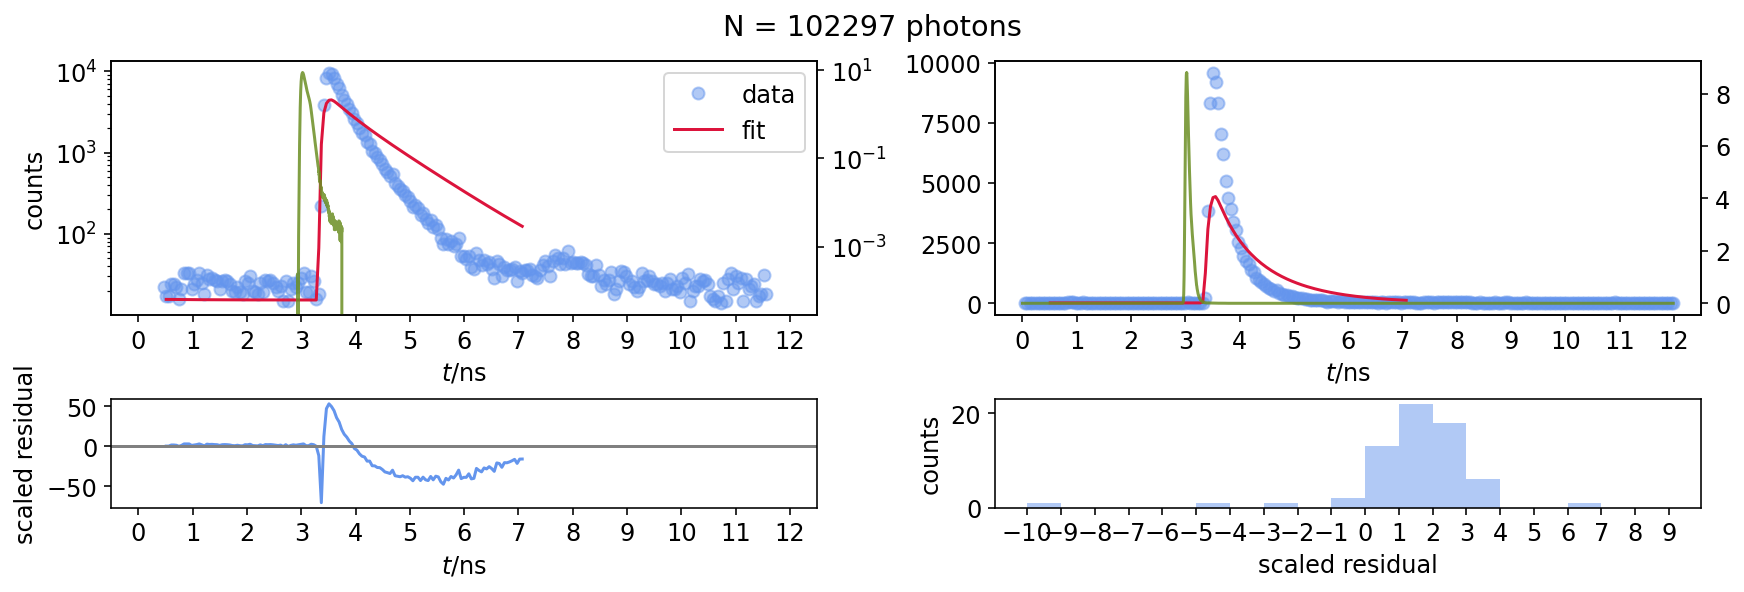

,value,err,min,max,step
shift,113.285885,20.583653,-300.000,300.0,1.000
A,0.997288,0.016447,0.700,1.0,0.001
tau1,1.000000,0.714177,1.000,9.0,0.001
tau2,0.335422,1.133711,0.010,1.0,0.001
f,0.737097,0.967557,0.001,1.0,0.001


In [57]:
dg = pc.decay_group(dc, irf.sel(channel="M2"), irf_kws=dc_kwargs_M2, fit_start_bin=10, fit_end_bin=150)

parameters = {
    "shift": {"value": 0    , "err": np.nan, "min": -300 , "max":   300, "step": 1   },
    "A":     {"value": 0.995, "err": np.nan, "min": 0.700, "max": 1.000, "step": 1e-3},
    "tau1":  {"value": 1.8,   "err": np.nan, "min": 1.000, "max": 9.000, "step": 1e-3},
    "tau2":  {"value": 0.25,  "err": np.nan, "min": 0.010, "max": 1.000, "step": 1e-3},
    "f":     {"value": 0.25,  "err": np.nan, "min": 0.001, "max": 1.000, "step": 1e-3},
}
fit_result, fit_status = dg.fit(model="2exp", parameters=parameters, plot=True)
display(fit_result)